# Scrapping Google Review

Tahap awal dari analisis ini adalah melakukan scrapping pada Google Maps Review. Digunakan package selenium dengan bantuan webdriver dan Beautiful Soup 4 untuk melakukan scrapping html

In [2]:
import pandas as pd
import os
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import numpy as np
from tqdm import tqdm

## Create Function

In [8]:
def _scrapping_google_review(url):
    path_chromedriver = os.path.join(os.getcwd(),"chromedriver_win32\chromedriver.exe")
    driver = webdriver.Chrome(path_chromedriver)
    #Website
    driver.get(url)

    time.sleep(10)
    
    #Find the review button
    rev_button = '//*[@id="QA0Szd"]/div/div/div[1]/div[2]/div/div[1]/div/div/div[2]/div[1]/div[1]/div[2]/div/div[1]/div[2]/span/span/span[2]'
    driver.find_element(By.XPATH, rev_button).click()
    
    time.sleep(10)
    
    #Find name
    num_rev = '//*[@id="QA0Szd"]/div/div/div[1]/div[2]/div/div[1]/div/div/div[2]/div[2]/div/div[2]/div[2]'
    total_number_of_reviews = driver.find_element(By.XPATH,num_rev).text.split(" ")[0]
    total_number_of_reviews = int(total_number_of_reviews.replace('.','')) if '.' in total_number_of_reviews else int(total_number_of_reviews)
    
    print(f'Total Number of Reviews: {total_number_of_reviews}')
    print()
    time.sleep(20)
    print('Loading all reviews...')

    #Load all reviews by scrolling down
    scroll = '//*[@id="QA0Szd"]/div/div/div[1]/div[2]/div/div[1]/div/div/div[2]'
    scrollable_div = driver.find_element(By.XPATH,scroll)

    total_rev = round(total_number_of_reviews/10)
    if total_rev > 100:
        total_rev = 120
    else:
        pass

    for i in tqdm(range(0,(total_rev))):
        driver.execute_script('arguments[0].scrollTop = arguments[0].scrollHeight', 
                    scrollable_div)
        time.sleep(2)
    print('Load finished')

    more_button_xpath = 'w8nwRe.kyuRq'
    more_button = driver.find_elements(By.CLASS_NAME,more_button_xpath)
    total_button = len(more_button)
    print()
    print('Expanding Review..')

    for i in tqdm(range(total_button)):
        driver.find_element(By.CLASS_NAME,more_button_xpath).click()

    time.sleep(5)
    
    #Parse HTML
    response = BeautifulSoup(driver.page_source, 'html.parser')

    #Get all reviews
    reviews = response.find_all('div', class_='jJc9Ad')

    print(f'Total Number of Reviews Scrapped: {len(reviews)}')
    return reviews

In [4]:
def _get_review_summary(result_set):
    rev_dict = {
        'Name' : [],
        'Status': [],
        'Number of Review' :[],
        'Review Rate': [],
        'Review Time': [],
        'Review Text' : []}
        
    for result in result_set:
        review_name = result.find('div', class_ = 'd4r55').text
        try:
          review = result.find('div', class_ = 'RfnDt').text
          if review.startswith('Local Guide'):
            review_status = 'Local Guide'
          else:
            review_status = '-'
          
          try:
            review_num = review.strip('Local Guide · ')
          except:
            review_num = review

        except:
          review = 'Uncategorized'
        review_rate = result.find('span', class_='kvMYJc')["aria-label"]
        review_time = result.find('span',class_='rsqaWe').text     
        review_text = result.find('span',class_='wiI7pd').text
        rev_dict['Name'].append(review_name)
        rev_dict['Status'].append(review_status)
        rev_dict['Number of Review'].append(review_num)
        rev_dict['Review Rate'].append(review_rate)
        rev_dict['Review Time'].append(review_time)
        rev_dict['Review Text'].append(review_text)   
    return(pd.DataFrame(rev_dict))

In [5]:
url_tanjungperak = ['https://goo.gl/maps/sVHB1mNji9JPwraf8',
                    'https://goo.gl/maps/RFfk3iLyH6BevQWj9',
                    'https://goo.gl/maps/Wsy7K8MhCqkFJx9t6',
                    'https://goo.gl/maps/RinsTcSfiPmRLNeJ6',
                    'https://goo.gl/maps/YEEFBNzjVkAwTfPCA',
                    ]
url_roro = ['https://goo.gl/maps/EYhHYXLECArriu9u7',
            'https://goo.gl/maps/uLDkqxXNR4ZC1z529']

url_gsn = 'https://goo.gl/maps/DByBkroEE9mNyViw6'

url_snq = 'https://goo.gl/maps/gsBXNFypwh8ZJyvw6'

url_jamrud = ['https://goo.gl/maps/aS69R1iNvARqafqYA',
              'https://goo.gl/maps/M55TQDMd6vg4GCY77',
              'https://goo.gl/maps/4pdb5mdyNxtPGRy87',
              'https://goo.gl/maps/MNhgoCV25weA1jUb8',
              'https://goo.gl/maps/FK3f5m518AiaweW96']

## Places

## Roro

In [8]:
roro = []

for i in url_roro:
    a = _scrapping_google_review(i)
    roro.append(a)

C:\Users\Ahmad Ulfi\AppData\Local\Temp\ipykernel_16880\1756425134.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path_chromedriver)


Total Number of Reviews: 4

Loading all reviews...


0it [00:00, ?it/s]


Load finished

Expanding Review..


100%|██████████| 1/1 [00:00<00:00,  4.77it/s]


Total Number of Reviews Scrapped: 4
Total Number of Reviews: 33

Loading all reviews...


100%|██████████| 3/3 [00:06<00:00,  2.14s/it]


Load finished

Expanding Review..


0it [00:00, ?it/s]


Total Number of Reviews Scrapped: 33


In [10]:
a = 1
for i in roro:
  review = _get_review_summary(i)
  name = f'Google Map Review Roro {a}.xlsx'
  review.to_excel(name)
  a+=1

## Gapura Surya Nusantara (GSN)

In [12]:
gsn = _scrapping_google_review(url_gsn)

C:\Users\Ahmad Ulfi\AppData\Local\Temp\ipykernel_16880\4219958328.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path_chromedriver)


Total Number of Reviews: 120

Loading all reviews...


100%|██████████| 12/12 [00:24<00:00,  2.07s/it]


Load finished

Expanding Review..


100%|██████████| 11/11 [00:05<00:00,  2.15it/s]


Total Number of Reviews Scrapped: 120


In [13]:
review_gsn = _get_review_summary(gsn)
review_gsn.to_excel('Google Map Review GSN.xlsx')

## Tanjung Perak

In [9]:
tjperak = []

for i in url_tanjungperak:
    a = _scrapping_google_review(i)
    tjperak.append(a)

C:\Users\Ahmad Ulfi\AppData\Local\Temp\ipykernel_16660\638011662.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path_chromedriver)


Total Number of Reviews: 2186

Loading all reviews...


100%|██████████| 120/120 [04:03<00:00,  2.03s/it]


Load finished

Expanding Review..


100%|██████████| 48/48 [00:03<00:00, 13.68it/s]


Total Number of Reviews Scrapped: 930
Total Number of Reviews: 920

Loading all reviews...


100%|██████████| 92/92 [03:07<00:00,  2.04s/it]


Load finished

Expanding Review..


100%|██████████| 24/24 [00:11<00:00,  2.12it/s]


Total Number of Reviews Scrapped: 870
Total Number of Reviews: 435

Loading all reviews...


100%|██████████| 44/44 [01:31<00:00,  2.09s/it]


Load finished

Expanding Review..


100%|██████████| 5/5 [00:00<00:00,  8.99it/s]


Total Number of Reviews Scrapped: 100
Total Number of Reviews: 24

Loading all reviews...


100%|██████████| 2/2 [00:04<00:00,  2.02s/it]


Load finished

Expanding Review..


100%|██████████| 1/1 [00:00<00:00,  7.60it/s]


Total Number of Reviews Scrapped: 24
Total Number of Reviews: 78

Loading all reviews...


100%|██████████| 8/8 [00:16<00:00,  2.02s/it]


Load finished

Expanding Review..


100%|██████████| 2/2 [00:00<00:00,  5.89it/s]


Total Number of Reviews Scrapped: 78


In [16]:
tjperak[1] = _scrapping_google_review(url_tanjungperak[1])
tjperak[2] = _scrapping_google_review(url_tanjungperak[2])

C:\Users\Ahmad Ulfi\AppData\Local\Temp\ipykernel_16660\638011662.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path_chromedriver)


Total Number of Reviews: 920

Loading all reviews...


100%|██████████| 92/92 [03:21<00:00,  2.19s/it]


Load finished

Expanding Review..


100%|██████████| 24/24 [00:08<00:00,  2.74it/s]


Total Number of Reviews Scrapped: 910
Total Number of Reviews: 435

Loading all reviews...


100%|██████████| 44/44 [01:29<00:00,  2.03s/it]


Load finished

Expanding Review..


100%|██████████| 8/8 [00:01<00:00,  4.65it/s]


Total Number of Reviews Scrapped: 420


In [17]:
a = 1
for i in tjperak:
  review = _get_review_summary(i)
  name = f'Google Map Review Tanjung Perak {a}.xlsx'
  review.to_excel(name)
  a+=1

## Surabaya North Quay

In [18]:
snq = _scrapping_google_review(url_snq)

C:\Users\Ahmad Ulfi\AppData\Local\Temp\ipykernel_16660\638011662.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path_chromedriver)


Total Number of Reviews: 18880

Loading all reviews...


100%|██████████| 120/120 [04:04<00:00,  2.04s/it]


Load finished

Expanding Review..


100%|██████████| 289/289 [00:22<00:00, 12.58it/s]


Total Number of Reviews Scrapped: 930


In [19]:
review_snq = _get_review_summary(snq)

review_snq.to_excel('Google Map Review SNQ.xlsx')

### Jamrud

In [20]:
num = 1

for i in url_jamrud:
    a = _scrapping_google_review(i)
    review = _get_review_summary(a)
    name = f'Google Map Review Jamrud {num}.xlsx'
    review.to_excel(name)
    num+=1

C:\Users\Ahmad Ulfi\AppData\Local\Temp\ipykernel_16660\638011662.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path_chromedriver)


Total Number of Reviews: 248

Loading all reviews...


100%|██████████| 25/25 [00:50<00:00,  2.03s/it]


Load finished

Expanding Review..


100%|██████████| 6/6 [00:00<00:00,  7.58it/s]


Total Number of Reviews Scrapped: 180
Total Number of Reviews: 471

Loading all reviews...


100%|██████████| 47/47 [01:35<00:00,  2.02s/it]


Load finished

Expanding Review..


100%|██████████| 14/14 [00:02<00:00,  5.59it/s]


Total Number of Reviews Scrapped: 470
Total Number of Reviews: 250

Loading all reviews...


100%|██████████| 25/25 [00:50<00:00,  2.02s/it]


Load finished

Expanding Review..


100%|██████████| 6/6 [00:00<00:00,  6.07it/s]


Total Number of Reviews Scrapped: 250
Total Number of Reviews: 15

Loading all reviews...


100%|██████████| 2/2 [00:04<00:00,  2.02s/it]


Load finished

Expanding Review..


100%|██████████| 1/1 [00:00<00:00,  9.93it/s]


Total Number of Reviews Scrapped: 15
Total Number of Reviews: 85

Loading all reviews...


100%|██████████| 8/8 [00:16<00:00,  2.02s/it]


Load finished

Expanding Review..


100%|██████████| 2/2 [00:00<00:00, 10.78it/s]


Total Number of Reviews Scrapped: 85


# Cleaning Data

In [42]:
import re
import string as s
import pandas as pd
import numpy as np

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
from tqdm import tqdm 
from IPython.display import clear_output

In [43]:
def _remove_emoji(string):
    '''Membersihkan Emoji'''
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [44]:
fac = StopWordRemoverFactory()
stopword = fac.create_stop_word_remover()

stem = StemmerFactory()
stemer = stem.create_stemmer()

def _stopstem(string):
    '''Menghapus stopwords dan melakukan stemming'''
    filtered = []
    for word in string.split():
        a = stemer.stem(word)
        a = stopword.remove(word)
        filtered.append(a)
    return filtered
    

In [45]:
def _preprocess(string):
    #Case Folding
    string = string.lower()
    string = string.replace('\n',' ')
    
    if string.startswith('(diterjemahkan'):
        string = ''
    else:
        pass
    
    string = re.sub(r"\d+", "", string)
    string = string.translate(str.maketrans(' ', ' ', s.punctuation))

    return string

In [46]:
list_stopwords = stopwords.words('indonesian')

list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'yah','sip',
                       '-','pelabuhan','pelindo'
                       'tanjung','perak','surabaya','indonesia','…'])

# convert list to dictionary
list_stopwords = set(list_stopwords)    

def _stop2(words):
    return [word for word in words if word not in list_stopwords]

In [47]:
def _deletereview0(string):
        while '' in string:
            string.remove('')
        
        if len(string)==0:
            string = ''
        return string

## Merge G Maps Review

In [48]:
excelgreview = []
for file in os.listdir(os.path.join(os.getcwd(),'Google Maps Review')):
    if file.endswith('.xlsx'):
        excelgreview.append(file)

In [50]:
reviewpenumpang = pd.DataFrame()
for file in excelgreview:
    path = os.path.join(os.getcwd(),'Google Maps Review',file)
    filename = str(file[:-5])
    filename = re.sub('Google Map Review ','',filename)
    exc = pd.read_excel(path)
    exc['File'] = filename
    reviewpenumpang = reviewpenumpang.append(exc)
    clear_output(wait=False)
#reviewpenumpang.to_excel('gabungan.xlsx')
# Hapus kolom index
reviewpenumpang = reviewpenumpang.drop(reviewpenumpang.columns[[0]],axis=1)

print(f'Total Review Awal = {len(reviewpenumpang)}')
reviewpenumpang

# Hapus Review Kosong pada Review Text
reviewpenumpang = reviewpenumpang[reviewpenumpang['Review Text'].notnull()]
reviewpenumpang = reviewpenumpang.reset_index(drop=True)
print(f'Total Review dengan Komentar = {len(reviewpenumpang)}')

# Hapus Emoji
reviewpenumpang['Review Text'] = reviewpenumpang['Review Text'].apply(_remove_emoji)

reviewpenumpang = reviewpenumpang[reviewpenumpang['Review Text']!= '']
reviewpenumpang = reviewpenumpang[reviewpenumpang['Review Text']!= ' ']
reviewpenumpang = reviewpenumpang.reset_index(drop=True)
print(f'Total Review setelah menghapus review yang berisikan hanya emoji = {len(reviewpenumpang)}')

# Preprocess Text
reviewpenumpang['Review Text'] = reviewpenumpang['Review Text'].apply(_preprocess)
reviewpenumpang['Review Text'] = reviewpenumpang['Review Text'].apply(_stopstem)
reviewpenumpang['Review Text'] = reviewpenumpang['Review Text'].apply(_stop2)
reviewpenumpang['Review Text'] = reviewpenumpang['Review Text'].apply(_deletereview0)

# Menghapus kembali Review Kosong pada Review Text setelah preprocess
reviewpenumpang = reviewpenumpang[reviewpenumpang['Review Text'] != '']
reviewpenumpang = reviewpenumpang.reset_index(drop=True)
print(f'Total Review dengan Komentar = {len(reviewpenumpang)}')

# Strip review rate
for i in range(0,len(reviewpenumpang)):
    reviewpenumpang['Review Rate'][i] = reviewpenumpang['Review Rate'][i].strip()

reviewpenumpang

Total Review Awal = 4449
Total Review dengan Komentar = 3109
Total Review setelah menghapus review yang berisikan hanya emoji = 3068
Total Review dengan Komentar = 2804


,Name,Status,Number of Review,Review Rate,Review Time,Review Text,File
0,anwari anwari,Local Guide,195 ulasan,5 bintang,3 bulan lalu,"[melayani, tiket, kapal, laut]",GSN
1,Luth “Luthfurrahman” Johari,Local Guide,203 ulasan,2 bintang,sebulan lalu,"[kotor, teratur, nyaman, minim, fasilitas]",GSN
2,Wayan Meila,Local Guide,530 ulasan,5 bintang,3 tahun lalu,"[terminal, penumpang, nyaman, interior, bandar...",GSN
3,saToe,Local Guide,663 ulasan,2 bintang,4 tahun lalu,"[pembenahan, lobby, arrival, departure, enak, ...",GSN
4,Zaen Gamal,Local Guide,610 ulasan,5 bintang,4 bulan lalu,"[antri, menunggu, kapal, oasis, lembar, multaq...",GSN
...,...,...,...,...,...,...,...
2799,MEDIA EDUKASI,Local Guide,522 ulasan,5 bintang,4 tahun lalu,[mantab],Tanjung Perak 5
2800,Rizal Fahmi,Local Guide,318 ulasan,5 bintang,3 tahun lalu,"[pelindo, port, run]",Tanjung Perak 5
2801,Suharjo Harjo,Local Guide,1 ulasan,5 bintang,2 hari lalu,"[penuh, pengalaman]",Tanjung Perak 5
2802,Copaey Poetra khayangan,Local Guide,1 ulasan,3 bintang,4 tahun lalu,[joym],Tanjung Perak 5


In [56]:
def _listtostring(listnya):
    a = ''
    for i in listnya:
        a += i + " "
    return a

reviewpenumpangcl = reviewpenumpang.copy()
reviewpenumpangcl['Review Text'] = reviewpenumpangcl['Review Text'].apply(_listtostring)
reviewpenumpangcl.to_excel('Clear.xlsx')

In [57]:
def _stringtolist(string):
    a = string.split()
    return a
reviewpenumpangcl = pd.read_excel('Clear.xlsx')
reviewpenumpangcl['Review Text'] = reviewpenumpangcl['Review Text'].apply(_stringtolist)
reviewpenumpangcl = reviewpenumpangcl.drop(reviewpenumpangcl.columns[[0]],axis=1)

reviewpenumpang = reviewpenumpangcl.copy()

In [58]:
#Dataframe by star
crosstab_bintang = reviewpenumpang['Review Rate'].value_counts().sort_index(ascending=False)
reviewpenumpang5 = reviewpenumpang[reviewpenumpang['Review Rate']=='5 bintang'].reset_index(drop=True)
reviewpenumpang4 = reviewpenumpang[reviewpenumpang['Review Rate']=='4 bintang'].reset_index(drop=True)
reviewpenumpang3 = reviewpenumpang[reviewpenumpang['Review Rate']=='3 bintang'].reset_index(drop=True)
reviewpenumpang2 = reviewpenumpang[reviewpenumpang['Review Rate']=='2 bintang'].reset_index(drop=True)
reviewpenumpang1 = reviewpenumpang[reviewpenumpang['Review Rate']=='1 bintang'].reset_index(drop=True)
crosstab_bintang

5 bintang    1702
4 bintang     673
3 bintang     268
2 bintang      61
1 bintang     100
Name: Review Rate, dtype: int64

In [60]:
reviewpenumpangpuas = reviewpenumpang5.append(reviewpenumpang4).reset_index(drop=True)
reviewpenumpangtidakpuas = reviewpenumpang1.append(reviewpenumpang2).append(reviewpenumpang3).reset_index(drop=True)

C:\Users\Ahmad Ulfi\AppData\Local\Temp\ipykernel_1072\2229263735.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reviewpenumpangpuas = reviewpenumpang5.append(reviewpenumpang4).reset_index(drop=True)
C:\Users\Ahmad Ulfi\AppData\Local\Temp\ipykernel_1072\2229263735.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reviewpenumpangtidakpuas = reviewpenumpang1.append(reviewpenumpang2).append(reviewpenumpang3).reset_index(drop=True)


## Word Cloud

In [139]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [140]:
def _wordcloud(df):    
    wordcloud = ""
    for i in range(0,len(df)):
        for text in df['Review Text'][i]:
            #print(text)
            wordcloud += text + " "

    word_cloud = WordCloud(collocations = False, background_color = 'white').generate(wordcloud)

    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

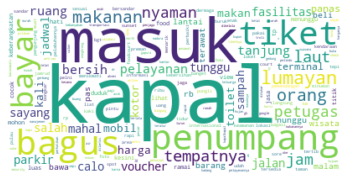

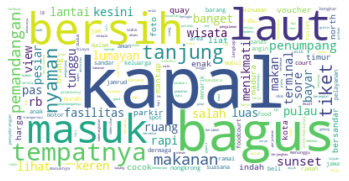

In [141]:
_wordcloud(reviewpenumpangtidakpuas)
_wordcloud(reviewpenumpangpuas)

## LDA

In [7]:
#reviewgsn = reviewpenumpang[reviewpenumpang['File'] == 'GSN']

### Review Tanjung Perak

In [61]:
Tanjung = ['Tanjung Perak 1', 'Tanjung Perak 2', 'Tanjung Perak 3','Tanjung Perak 5']
reviewdatatanjungpuas = reviewpenumpangpuas[(reviewpenumpangpuas['File'].isin(Tanjung))].reset_index(drop=True)
reviewdatatanjungtidakpuas = reviewpenumpangtidakpuas[(reviewpenumpangtidakpuas['File'].isin(Tanjung))].reset_index(drop=True)

### Review Data Jamrud

In [62]:
Jamrud = ['Jamrud 1', 'Jamrud 2', 'Jamrud 3', 'Jamrud 4', 'Jamrud 5',]
reviewdatajamrud = reviewpenumpang[(reviewpenumpang['File'].isin(Jamrud))].reset_index(drop=True)
reviewdatajamrudpuas = reviewpenumpangpuas[(reviewpenumpangpuas['File'].isin(Jamrud))].reset_index(drop=True)
reviewdatajamrudtidakpuas = reviewpenumpangtidakpuas[(reviewpenumpangtidakpuas['File'].isin(Jamrud))].reset_index(drop=True)

### Review Data Roro

In [63]:
Roro = ['Roro 1', 'Roro 2']
reviewdataroro = reviewpenumpang[(reviewpenumpang['File'].isin(Roro))].reset_index(drop=True)
reviewdataroropuas = reviewpenumpangpuas[(reviewpenumpangpuas['File'].isin(Roro))].reset_index(drop=True)
reviewdatarorotidakpuas = reviewpenumpangtidakpuas[(reviewpenumpangtidakpuas['File'].isin(Roro))].reset_index(drop=True)

### Review Data GSN

In [64]:
reviewdatagsn = reviewpenumpang[(reviewpenumpang['File']=='GSN')].reset_index(drop=True)
reviewdatagsn

,Name,Status,Number of Review,Review Rate,Review Time,Review Text,File
0,anwari anwari,Local Guide,195 ulasan,5 bintang,3 bulan lalu,"[melayani, tiket, kapal, laut]",GSN
1,Luth “Luthfurrahman” Johari,Local Guide,203 ulasan,2 bintang,sebulan lalu,"[kotor, teratur, nyaman, minim, fasilitas]",GSN
2,Wayan Meila,Local Guide,530 ulasan,5 bintang,3 tahun lalu,"[terminal, penumpang, nyaman, interior, bandar...",GSN
3,saToe,Local Guide,663 ulasan,2 bintang,4 tahun lalu,"[pembenahan, lobby, arrival, departure, enak, ...",GSN
4,Zaen Gamal,Local Guide,610 ulasan,5 bintang,4 bulan lalu,"[antri, menunggu, kapal, oasis, lembar, multaq...",GSN
...,...,...,...,...,...,...,...
64,Yuliani Selaras,Local Guide,2 ulasan,5 bintang,4 tahun lalu,[keren],GSN
65,MBUNA NEW FLA,Local Guide,3 ulasan,5 bintang,2 tahun lalu,"[free, polusi]",GSN
66,Jogi Ardyawan,Local Guide,42 ulasan,3 bintang,4 tahun lalu,"[gedung, representative]",GSN
67,Imach Satar,Local Guide,13 ulasan,3 bintang,seminggu lalu,"[tempatnya, lumayan, tp, minim, fasilitas, ked...",GSN


### Review Data SNQ

In [65]:
reviewdatasnq = reviewpenumpang[(reviewpenumpang['File']=='SNQ')].reset_index(drop=True)
reviewdatasnq

,Name,Status,Number of Review,Review Rate,Review Time,Review Text,File
0,Immash Pratiwi,Local Guide,113 ulasan,4 bintang,5 bulan lalu,"[masuk, area, parkir, membayar, loket, membaya...",SNQ
1,Zulfa Na,Local Guide,107 ulasan,3 bintang,5 bulan lalu,"[tempatnya, bagus, makanannya, beragam, hargan...",SNQ
2,Ridwan Muhammady,Local Guide,906 ulasan,3 bintang,5 bulan lalu,"[kesini, bayarnya, x, lantai, bayar, rborang, ...",SNQ
3,debieika anshory,Local Guide,11 ulasan,4 bintang,4 minggu lalu,"[ah, serius, nyaman, bgt, santai, ama, pasanga...",SNQ
4,Ruli Retno,Local Guide,556 ulasan,4 bintang,2 bulan lalu,"[lumayan, banget, main, kota, bayar, rb, liat,...",SNQ
...,...,...,...,...,...,...,...
924,Rafika Firdani Auliya,Local Guide,100 ulasan,5 bintang,2 tahun lalu,"[cocok, banget, liat, sunset, kapal, pesiar, g...",SNQ
925,Ika Nur Noviyanti,Local Guide,89 ulasan,4 bintang,setahun lalu,"[makan, view, laut, wow]",SNQ
926,Danny Kosasih,Local Guide,206 ulasan,4 bintang,4 tahun lalu,"[pasar, hati, beli, apel, bungkus, busuk, sisi...",SNQ
927,Muhammad Farhan,Local Guide,176 ulasan,5 bintang,4 bulan lalu,"[bagus, menikmati, senja, didalamnya, museum, ...",SNQ


## Latent Dirichlet Allocation

### Review Tanjung Perak

In [66]:
from gensim import corpora, models
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
import matplotlib.pyplot as plt

#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in tqdm(range(start, limit, step)):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=300)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

In [94]:
def _LatentDirichletAllocation(datalda):
    dictionary = corpora.Dictionary(datalda)

    doc_term_matrix = [dictionary.doc2bow(doc) for doc in datalda]

    start=1
    limit=5
    step=1

    corpus_tfidf = models.TfidfModel(doc_term_matrix)[doc_term_matrix]
    model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf, 
                                                        texts=datalda, start=start, limit=limit, step=step)
    HasilCoherence = pd.DataFrame({'Model': model_list,'Coherence Value':coherence_values})
    
    #show graphs
    
    
    x = range(start, limit, step)
    PlotCoherence, ax = plt.subplots(figsize=(10, 8))
    ax.plot(x, coherence_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.grid(True)

    HasilCoherenceMax = int(HasilCoherence[HasilCoherence['Coherence Value'] == HasilCoherence['Coherence Value'].max()].index.values)
    Model = HasilCoherence['Model'][HasilCoherenceMax].show_topics(num_topics=(HasilCoherenceMax+1))

    # Word Count of Topic Keywords

    from collections import Counter
    topics = HasilCoherence['Model'][HasilCoherenceMax].show_topics(False)
    data_flat = [w for w_list in datalda for w in w_list]
    counter = Counter(data_flat)

    out = []
    for i, topic in topics:
        for word, weight in topic:
            out.append([word, i , weight, counter[word]])

    df_imp_wcount = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count']) 
    
    return doc_term_matrix, HasilCoherence, HasilCoherenceMax, Model, PlotCoherence, df_imp_wcount

### Tanjung Perak

100%|██████████| 4/4 [00:10<00:00,  2.51s/it]


ValueError: not enough values to unpack (expected 2, got 1)

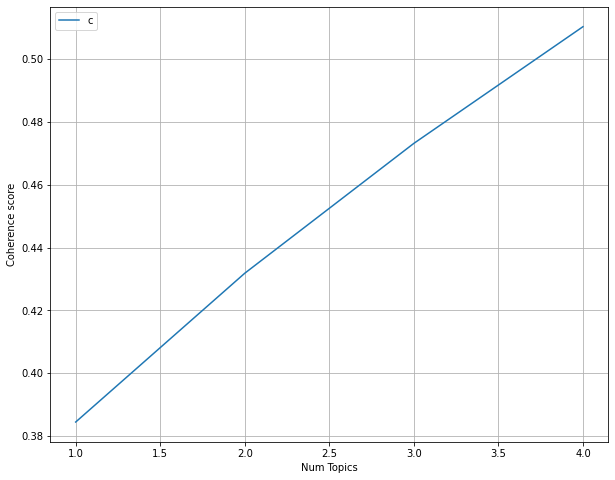

In [95]:
DocTjPuas, CoherenceTjPuas,CoherenceTjPuasMax,ModelTjPuas, PlotTjPuas, ImpTjPuas = _LatentDirichletAllocation(
    reviewdatatanjungpuas['Review Text'])


In [89]:
ModelTjPuas

[(0,
  '0.033*"nyaman" + 0.017*"mantab" + 0.017*"luas" + 0.014*"oke" + 0.013*"kapal" + 0.010*"laut" + 0.010*"penumpang" + 0.009*"legundi" + 0.009*"sepi" + 0.008*"top"'),
 (1,
  '0.015*"sibuk" + 0.014*"terbaik" + 0.012*"lumayan" + 0.010*"fasilitas" + 0.010*"kamal" + 0.009*"suka" + 0.009*"kerja" + 0.009*"mudik" + 0.008*"kapal" + 0.007*"pelindo"'),
 (2,
  '0.012*"tempatnya" + 0.011*"padat" + 0.009*"salah" + 0.009*"pelayanan" + 0.009*"pulau" + 0.008*"rapi" + 0.007*"bersih" + 0.007*"uang" + 0.006*"modern" + 0.006*"baguss"'),
 (3,
  '0.082*"bagus" + 0.018*"bersih" + 0.015*"pelayanannya" + 0.013*"suka" + 0.011*"nyaman" + 0.011*"indah" + 0.009*"fasilitas" + 0.009*"mantul" + 0.007*"hatihati" + 0.007*"ramah"'),
 (4,
  '0.025*"bagus" + 0.010*"jalan" + 0.008*"kapal" + 0.007*"penyeberangan" + 0.006*"mantap" + 0.006*"tanjunng" + 0.006*"kesini" + 0.006*"padat" + 0.006*"internasional" + 0.006*"siip"'),
 (5,
  '0.020*"rapi" + 0.018*"tunggu" + 0.014*"ruang" + 0.011*"memuaskan" + 0.008*"sejuta" + 0.008*"

In [29]:
ModelTjPuas

[(0,
  '0.011*"pemandangan" + 0.009*"semoga" + 0.008*"modern" + 0.007*"nyaman" + 0.006*"lembar" + 0.006*"asri" + 0.006*"mantaps" + 0.006*"khas" + 0.006*"disurabaya" + 0.006*"kerja"'),
 (1,
  '0.079*"bagus" + 0.012*"terbaik" + 0.007*"fasilitas" + 0.006*"bersih" + 0.006*"kebersihan" + 0.005*"terpadat" + 0.005*"karyawannya" + 0.005*"pelindo" + 0.005*"enak" + 0.005*"bertahan"'),
 (2,
  '0.015*"kapal" + 0.010*"nyaman" + 0.010*"penyebrangan" + 0.009*"pelabuhannya" + 0.009*"damai" + 0.009*"mantap" + 0.008*"bersih" + 0.008*"pelni" + 0.008*"fasilitasnya" + 0.006*"jadwal"'),
 (3,
  '0.017*"padat" + 0.011*"kapal" + 0.008*"kesini" + 0.008*"ramai" + 0.008*"indah" + 0.008*"antrian" + 0.007*"maju" + 0.007*"penumpang" + 0.007*"luas" + 0.006*"tanjunng"'),
 (4,
  '0.038*"bagus" + 0.019*"timur" + 0.015*"bersih" + 0.010*"jawa" + 0.009*"lumayan" + 0.008*"berkesan" + 0.007*"terbesar" + 0.006*"langsung" + 0.006*"orang" + 0.006*"laut"'),
 (5,
  '0.061*"bagus" + 0.032*"keren" + 0.015*"pelayanan" + 0.010*"siip"

100%|██████████| 49/49 [02:24<00:00,  2.95s/it]


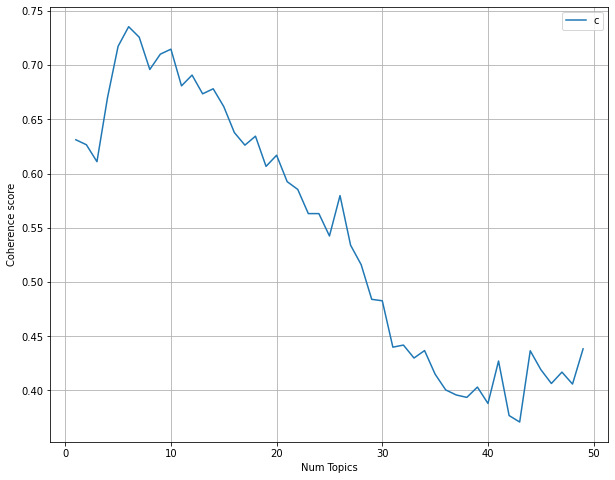

In [27]:
DocTjTidakPuas, CoherenceTjTidakPuas,CoherenceTjTidakPuasMax,ModelTjTidakPuas, PlotTjTidakPuas = _LatentDirichletAllocation(
    reviewdatatanjungtidakpuas['Review Text'])

In [30]:
ModelTjTidakPuas

[(0,
  '0.016*"tanjung" + 0.011*"bagus" + 0.010*"hati" + 0.009*"bersandar" + 0.008*"keamanan" + 0.007*"kesini" + 0.007*"luas" + 0.007*"kapal" + 0.007*"calo" + 0.006*"akurat"'),
 (1,
  '0.012*"nyaman" + 0.009*"kebersihan" + 0.007*"penyeberangan" + 0.006*"ehh" + 0.006*"akurat" + 0.006*"padat" + 0.006*"megah" + 0.006*"bagus" + 0.006*"tempatnya" + 0.005*"membingungkan"'),
 (2,
  '0.017*"bagus" + 0.011*"kapal" + 0.010*"oke" + 0.010*"rame" + 0.008*"jalan" + 0.008*"wilayahnya" + 0.008*"jadwal" + 0.007*"terbesar" + 0.006*"masuk" + 0.006*"pelayanan"'),
 (3,
  '0.013*"salah" + 0.010*"bersih" + 0.007*"calo" + 0.007*"kali" + 0.007*"lokasi" + 0.007*"arah" + 0.006*"penyebrangan" + 0.006*"aman" + 0.006*"gelap" + 0.006*"mantul"'),
 (4,
  '0.028*"lumayan" + 0.019*"calo" + 0.015*"pungli" + 0.009*"perbaiki" + 0.006*"pelabuhannya" + 0.006*"kota" + 0.006*"pelayanan" + 0.006*"mantap" + 0.006*"semrawut" + 0.006*"macet"'),
 (5,
  '0.017*"kotor" + 0.016*"panas" + 0.015*"ramai" + 0.008*"titik" + 0.007*"kapal" +

### Jamrud

100%|██████████| 49/49 [02:25<00:00,  2.97s/it]


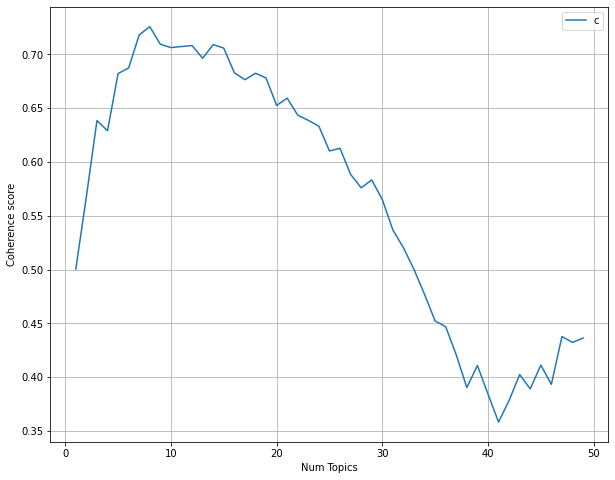

In [31]:
DocJrPuas, CoherenceJrPuas,CoherenceJrPuasMax,ModelJrPuas, PlotJrPuas = _LatentDirichletAllocation(
    reviewdatajamrudpuas['Review Text'])

In [32]:
ModelJrPuas

[(0,
  '0.020*"rapi" + 0.019*"aman" + 0.013*"bersih" + 0.008*"siiip" + 0.008*"mah" + 0.007*"tetep" + 0.007*"bagus" + 0.007*"km" + 0.007*"sngat" + 0.006*"tertata"'),
 (1,
  '0.014*"bersih" + 0.013*"lumayan" + 0.010*"luas" + 0.010*"kapal" + 0.010*"alfa" + 0.009*"semoga" + 0.007*"mantul" + 0.007*"petunjuk" + 0.007*"yus" + 0.007*"amantertib"'),
 (2,
  '0.020*"mantap" + 0.019*"bagus" + 0.016*"barang" + 0.012*"ramai" + 0.011*"pulau" + 0.009*"bongkar" + 0.008*"kerja" + 0.008*"kapal" + 0.007*"rejeki" + 0.007*"kendaraan"'),
 (3,
  '0.016*"bersih" + 0.015*"jamrud" + 0.010*"aman" + 0.010*"kapal" + 0.009*"sibuk" + 0.008*"nyaman" + 0.008*"mencari" + 0.008*"dermaga" + 0.007*"mantap" + 0.007*"top"'),
 (4,
  '0.039*"bagus" + 0.012*"menunggu" + 0.012*"kerja" + 0.011*"kapal" + 0.009*"sandar" + 0.007*"lihat" + 0.007*"terminal" + 0.007*"masuk" + 0.007*"sby" + 0.006*"bersih"'),
 (5,
  '0.025*"internasional" + 0.020*"nyaman" + 0.011*"oke" + 0.010*"bersih" + 0.009*"roro" + 0.009*"pengiriman" + 0.007*"rapih" 

100%|██████████| 49/49 [02:00<00:00,  2.45s/it]


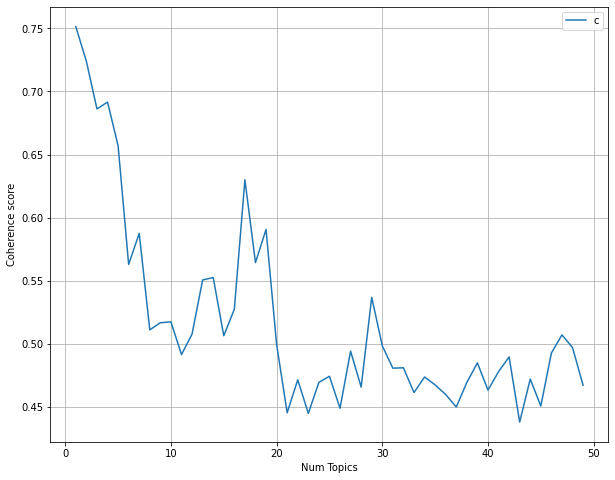

In [33]:
DocJrTidakPuas, CoherenceJrTidakPuas,CoherenceJrTidakPuasMax,ModelJrTidakPuas, PlotJrTidakPuas = _LatentDirichletAllocation(
    reviewdatajamrudtidakpuas['Review Text'])

In [34]:
ModelJrTidakPuas

[(0,
  '0.010*"panas" + 0.009*"lumayan" + 0.008*"kapal" + 0.007*"internasional" + 0.006*"bersih" + 0.006*"penumpang" + 0.006*"muat" + 0.006*"kotor" + 0.005*"bagus" + 0.005*"barang"')]

### Roro

100%|██████████| 49/49 [01:38<00:00,  2.01s/it]


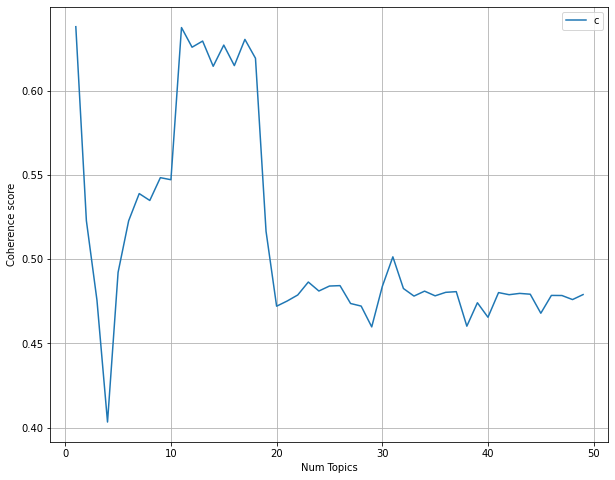

In [39]:
DocRoroPuas, CoherenceRoroPuas,CoherenceRoroPuasMax,ModelRoroPuas, PlotRoroPuas = _LatentDirichletAllocation(
    reviewdataroropuas['Review Text'])

In [40]:
ModelRoroPuas

[(0,
  '0.021*"lumayan" + 0.018*"menyenangkan" + 0.016*"terminalnya" + 0.016*"ramai" + 0.016*"pas" + 0.015*"adem" + 0.015*"tunggu" + 0.015*"ruang" + 0.015*"kapal" + 0.015*"layak"')]